In [84]:
import pandas as pd
import numpy as np
import os
import seaborn as sns


ANNOT_CSV_FILE = 'data/GEMS-INN_2023-01-30_expert.csv'


GEMS_9 = ['Wonder', 'Transcendence', 'Nostalgia', 'Tenderness', 'Peacfulness', 'Joy', 'Power', 'Tension', 'Sadness']
NUM_CLASSES = len(GEMS_9)
GENRE_MAP = {'H': 'Hip-Hop', 'K': 'Classical', 'P': 'Pop'}

emma_df = pd.read_csv(ANNOT_CSV_FILE, encoding="ISO-8859-1")
emma_df.dropna(inplace=True)

In [85]:


emma_df = emma_df[~emma_df['title'].isin(('Control', 'O.P.P.','Put Your Hands Where My Eyes Can See', 'Part II', '6. Sinfonie, 1. Satz'))].reset_index(drop=True)

In [86]:
emma_df

,Unnamed: 0,artist,title,Wonder,Transcendence,Nostalgia,Tenderness,Peacfulness,Joy,Power,Tension,Sadness,Sublimity,Vitality,Unease,ICC,Familiarity,Liking
0,1,Trailerpark,Schlechter Tag,15.65,19.68,3.54,5.30,5.08,22.33,2.35,11.20,0.00,18.50,21.15,10.50,0.65,2.00,3.17
1,2,Desiigner,Panda,24.69,4.69,0.78,9.30,7.92,28.26,22.73,9.33,1.06,19.39,30.32,8.91,0.76,4.25,3.83
2,3,NAS,Doo Rags,24.43,18.57,14.29,19.88,17.55,24.67,27.48,0.00,2.50,33.45,36.15,2.11,0.58,2.08,4.00
3,4,DMX,X Gon' Give It To Ya,17.27,7.05,9.89,8.60,9.52,37.27,37.77,0.00,0.73,26.05,40.19,0.61,0.86,3.91,4.18
4,5,Xatar,Meine Große Liebe,6.46,15.86,0.00,9.27,0.67,13.86,15.98,3.79,0.00,19.42,19.77,3.38,0.52,2.00,2.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,367,Oasis,Don't Look Back In Anger,10.31,7.60,31.85,14.10,15.00,18.47,3.99,6.56,10.03,26.27,17.74,11.55,0.84,3.89,3.44
361,368,Der Junge mit der Gitarre,Hallo Worum Gehts Ich Bin Dagegen,11.20,8.11,0.00,0.00,4.20,27.52,15.02,8.74,1.33,13.45,30.34,9.19,0.89,1.28,2.31
362,369,Chris Brown,Forever,17.44,1.79,10.14,10.42,5.66,26.20,11.26,9.63,0.00,22.56,24.38,8.71,0.81,2.48,2.86
363,370,Ryan Adams,Lucky Now,14.44,9.07,13.75,17.13,30.12,16.12,4.26,9.06,3.42,29.92,15.01,11.20,0.79,1.28,2.72


In [87]:
(emma_df == 0).sum()

Unnamed: 0         0
artist             0
title              0
Wonder             1
Transcendence      1
Nostalgia          8
Tenderness        23
Peacfulness        3
Joy                1
Power              9
Tension           13
Sadness          116
Sublimity          0
Vitality           0
Unease             1
ICC                0
Familiarity        0
Liking             0
dtype: int64

/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[(0.0, 100.0)]

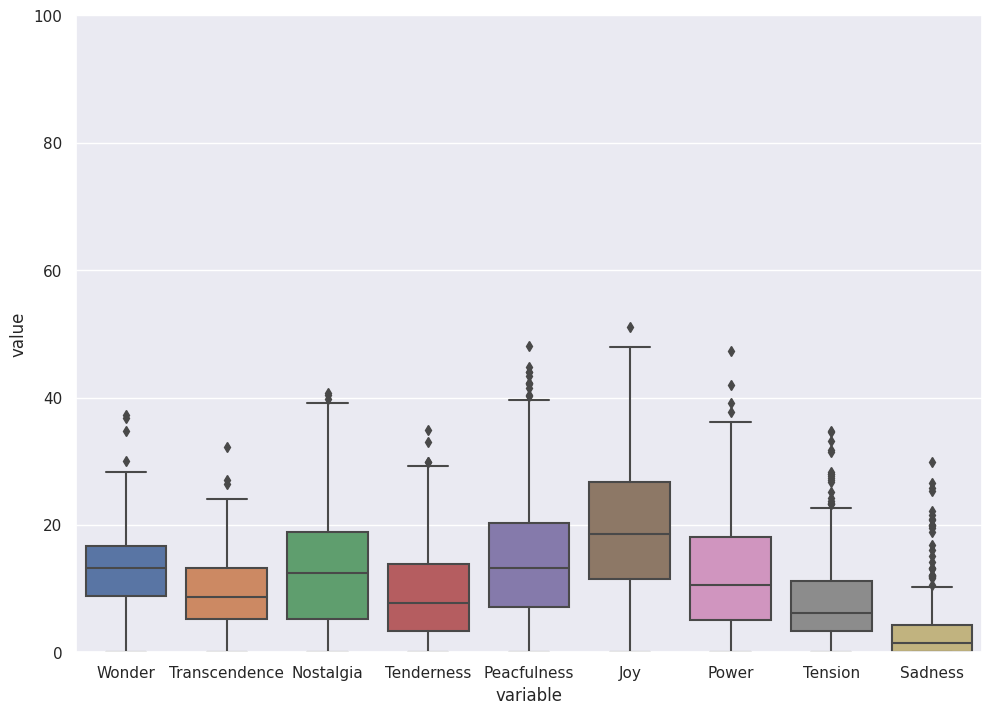

In [88]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

box = sns.boxplot(x="variable", y="value", data=pd.melt(emma_df[GEMS_9]) )
box.set(ylim=(0,100))

In [89]:
data = pd.melt(emma_df[GEMS_9])

data["hue"] = data["variable"].apply(lambda x: x[:1])
data

,variable,value,hue
0,Wonder,15.65,W
1,Wonder,24.69,W
2,Wonder,24.43,W
3,Wonder,17.27,W
4,Wonder,6.46,W
...,...,...,...
3280,Sadness,10.03,S
3281,Sadness,1.33,S
3282,Sadness,0.00,S
3283,Sadness,3.42,S


/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarn

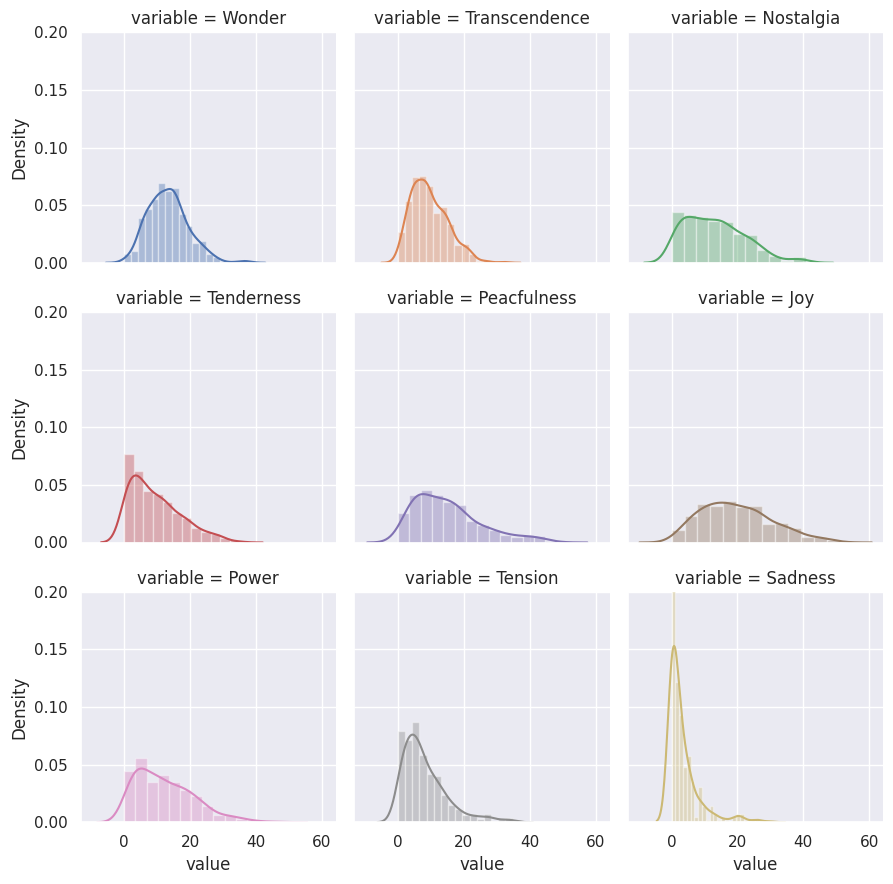

In [90]:
import matplotlib.pyplot as plt



g = sns.FacetGrid(data, col="variable", col_wrap=3, hue="variable")
g.map(sns.distplot, "value")
g.set(ylim=(0,0.2))
plt.show()

/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureW

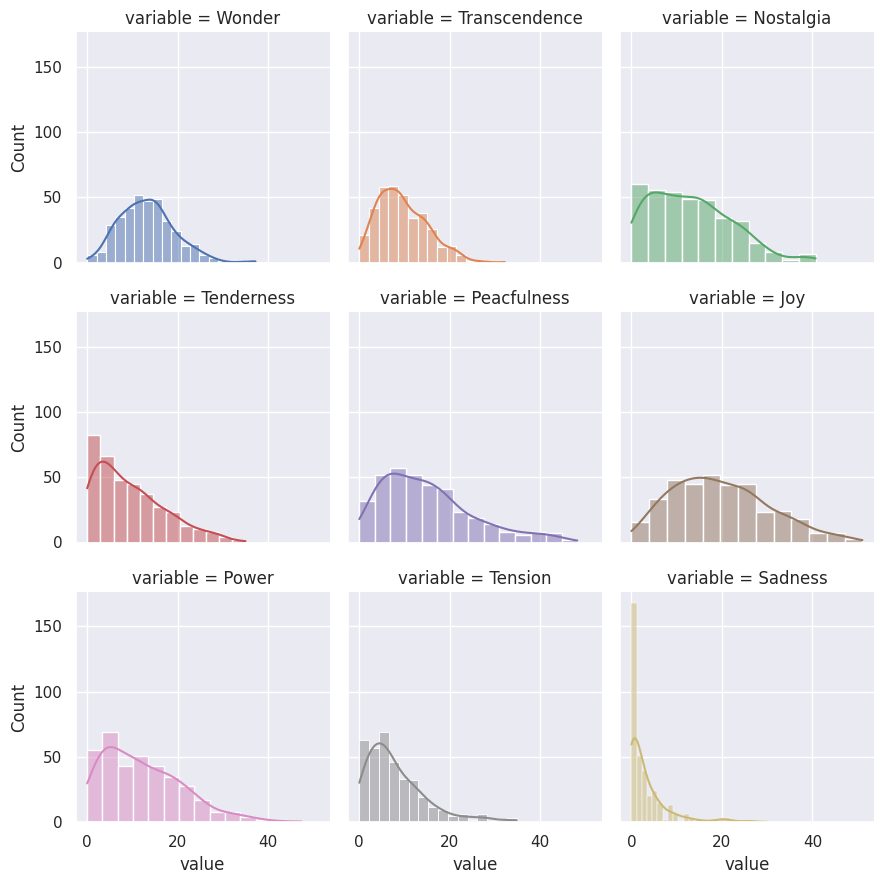

In [91]:
import matplotlib.pyplot as plt



g = sns.FacetGrid(data, col="variable", col_wrap=3, hue="variable")
g.map(sns.histplot, "value", kde=True, stat='count')
#g.set(ylim=(0,0.2))
plt.show()

In [92]:
train_indices = [109, 130, 31, 344, 178, 180, 43, 123, 170, 7, 362, 197, 343, 158, 6, 93, 209, 59, 326, 173, 90, 328, 143, 256, 48, 104, 322, 62, 179, 275, 171, 364, 261, 266, 60, 131, 198, 84, 8, 263, 154, 350, 18, 1, 271, 156, 58, 240, 311, 5, 86, 247, 363, 315, 30, 115, 132, 260, 277, 312, 102, 329, 336, 251, 54, 249, 208, 200, 218, 42, 361, 121, 168, 182, 32, 292, 17, 124, 21, 20, 145, 191, 14, 61, 78, 92, 233, 4, 288, 82, 153, 221, 242, 199, 284, 41, 341, 95, 254, 50, 155, 339, 163, 76, 253, 27, 129, 45, 195, 128, 67, 239, 286, 0, 305, 356, 348, 75, 281, 290, 164, 196, 68, 192, 276, 226, 237, 29, 184, 250, 2, 220, 141, 64, 267, 353, 248, 97, 345, 340, 152, 272, 331, 270, 303, 160, 39, 56, 24, 46, 252, 70, 283, 310, 204, 219, 134, 126, 358, 319, 73, 234, 202, 255, 316, 278, 108, 33, 137, 205, 161, 351, 117, 28, 166, 338, 138, 300, 236, 296, 360, 273, 87, 36, 136, 107, 181, 189, 83, 186, 232, 330, 324, 51, 347, 313, 148, 116, 23, 35, 98, 295, 185, 150, 282, 40, 193, 63, 274, 235, 22, 135, 309, 176, 183, 49, 194, 349, 357, 172, 110, 79, 335, 174, 352, 81, 3, 142, 301, 229, 112, 214, 355, 332, 101, 287, 13, 308, 258, 119, 111, 47, 15, 16, 216, 302, 44, 279, 346, 52, 71, 114, 125, 140, 12, 57, 327, 134, 64, 71, 48, 287, 86, 22, 131, 277, 5, 356, 340, 90, 23, 123, 290, 263, 1, 345, 150, 140, 2, 142, 121, 132, 117, 281, 70, 226, 229, 344, 226, 226, 226, 143, 226, 226, 226, 226, 226, 226, 248, 83, 232, 8, 31]
train_set = emma_df.loc[train_indices]

/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:111

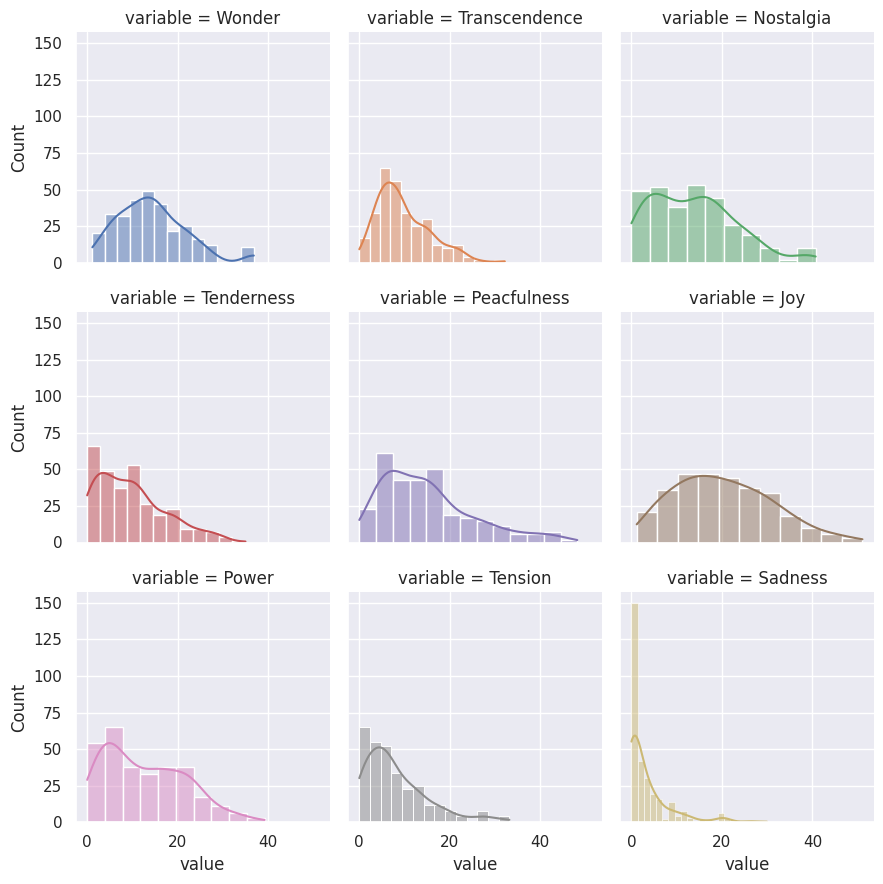

In [93]:
train_data = pd.melt(train_set[GEMS_9])

train_data["hue"] = train_data["variable"].apply(lambda x: x[:1])


g = sns.FacetGrid(train_data, col="variable", col_wrap=3, hue="variable")
g.map(sns.histplot, "value", kde=True, stat='count')
#g.set(ylim=(0,0.2))
plt.show()

In [94]:
emma_df

,Unnamed: 0,artist,title,Wonder,Transcendence,Nostalgia,Tenderness,Peacfulness,Joy,Power,Tension,Sadness,Sublimity,Vitality,Unease,ICC,Familiarity,Liking
0,1,Trailerpark,Schlechter Tag,15.65,19.68,3.54,5.30,5.08,22.33,2.35,11.20,0.00,18.50,21.15,10.50,0.65,2.00,3.17
1,2,Desiigner,Panda,24.69,4.69,0.78,9.30,7.92,28.26,22.73,9.33,1.06,19.39,30.32,8.91,0.76,4.25,3.83
2,3,NAS,Doo Rags,24.43,18.57,14.29,19.88,17.55,24.67,27.48,0.00,2.50,33.45,36.15,2.11,0.58,2.08,4.00
3,4,DMX,X Gon' Give It To Ya,17.27,7.05,9.89,8.60,9.52,37.27,37.77,0.00,0.73,26.05,40.19,0.61,0.86,3.91,4.18
4,5,Xatar,Meine Große Liebe,6.46,15.86,0.00,9.27,0.67,13.86,15.98,3.79,0.00,19.42,19.77,3.38,0.52,2.00,2.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,367,Oasis,Don't Look Back In Anger,10.31,7.60,31.85,14.10,15.00,18.47,3.99,6.56,10.03,26.27,17.74,11.55,0.84,3.89,3.44
361,368,Der Junge mit der Gitarre,Hallo Worum Gehts Ich Bin Dagegen,11.20,8.11,0.00,0.00,4.20,27.52,15.02,8.74,1.33,13.45,30.34,9.19,0.89,1.28,2.31
362,369,Chris Brown,Forever,17.44,1.79,10.14,10.42,5.66,26.20,11.26,9.63,0.00,22.56,24.38,8.71,0.81,2.48,2.86
363,370,Ryan Adams,Lucky Now,14.44,9.07,13.75,17.13,30.12,16.12,4.26,9.06,3.42,29.92,15.01,11.20,0.79,1.28,2.72


In [95]:
emma_df.iloc[161]

Unnamed: 0                                       166
artist                                        Brahms
title            Klaviersonate Nr. 3 (Zwei Klaviere)
Wonder                                          10.5
Transcendence                                  14.07
Nostalgia                                       8.05
Tenderness                                     10.56
Peacfulness                                    11.81
Joy                                            11.76
Power                                          20.61
Tension                                        12.65
Sadness                                         5.93
Sublimity                                      23.16
Vitality                                       19.65
Unease                                         16.29
ICC                                             0.19
Familiarity                                     1.96
Liking                                          3.22
Name: 161, dtype: object

In [96]:
train_indices_os =[109, 130, 31, 344, 178, 180, 43, 123, 170, 7, 362, 197, 343, 158, 6, 93, 209, 59, 326, 173, 90, 328, 143, 256, 48, 104, 322, 62, 179, 275, 171, 364, 261, 266, 60, 131, 198, 84, 8, 263, 154, 350, 18, 1, 271, 156, 58, 240, 311, 5, 86, 247, 363, 315, 30, 115, 132, 260, 277, 312, 102, 329, 336, 251, 54, 249, 208, 200, 218, 42, 361, 121, 168, 182, 32, 292, 17, 124, 21, 20, 145, 191, 14, 61, 78, 92, 233, 4, 288, 82, 153, 221, 242, 199, 284, 41, 341, 95, 254, 50, 155, 339, 163, 76, 253, 27, 129, 45, 195, 128, 67, 239, 286, 0, 305, 356, 348, 75, 281, 290, 164, 196, 68, 192, 276, 226, 237, 29, 184, 250, 2, 220, 141, 64, 267, 353, 248, 97, 345, 340, 152, 272, 331, 270, 303, 160, 39, 56, 24, 46, 252, 70, 283, 310, 204, 219, 134, 126, 358, 319, 73, 234, 202, 255, 316, 278, 108, 33, 137, 205, 161, 351, 117, 28, 166, 338, 138, 300, 236, 296, 360, 273, 87, 36, 136, 107, 181, 189, 83, 186, 232, 330, 324, 51, 347, 313, 148, 116, 23, 35, 98, 295, 185, 150, 282, 40, 193, 63, 274, 235, 22, 135, 309, 176, 183, 49, 194, 349, 357, 172, 110, 79, 335, 174, 352, 81, 3, 142, 301, 229, 112, 214, 355, 332, 101, 287, 13, 308, 258, 119, 111, 47, 15, 16, 216, 302, 44, 279, 346, 52, 71, 114, 125, 140, 12, 57, 327, 161, 248, 44, 256, 302, 124, 279, 335, 8, 242, 132, 128, 44, 303, 335, 326, 302, 326, 326, 356, 326, 350, 248, 198, 326, 326, 350, 7, 142, 326, 326, 326, 326, 326, 326, 152, 132, 248, 152, 356, 356, 326, 326, 356, 356, 350, 218, 284, 326, 81, 350, 350, 29, 326, 326, 302, 302, 350, 326, 164, 279, 319, 131, 119, 326, 350, 350, 326, 319, 326, 173, 44, 44, 132, 164, 303, 302, 173, 220, 132, 356, 284, 326, 248, 326, 284, 350, 29, 29, 302, 248, 350, 302, 326, 326, 131, 279, 350, 350, 194, 302, 131, 350, 326, 29, 29, 326, 198, 29, 29, 131, 131, 335, 44, 326, 29, 29, 164, 29, 326, 356, 326, 29, 248, 29, 29, 350, 29, 29, 350, 8, 302, 326, 284, 236, 335, 284, 302, 240, 29, 29, 198, 256, 132, 284, 350, 326, 198, 326, 326, 29, 356, 29, 29, 29, 326, 131, 326, 350, 284, 326, 350, 302, 284, 326, 284, 350, 256, 326, 236, 29, 44, 256, 29, 279, 284, 284, 29, 29, 302, 284, 29, 350, 29, 353, 350, 29, 29, 29, 350, 198, 353, 29, 29, 29, 353, 353, 29, 284, 29, 29, 29, 29, 353, 284, 29, 29, 284, 29, 29, 29, 29, 29, 353, 29, 29, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353]

In [97]:
new_emma = emma_df.iloc[train_indices_os]

In [98]:
import pandas as pd
pd.set_option("display.max_rows", 20) 
new_emma['Tenderness']

109     2.34
130     7.51
31     12.49
344     1.96
178     0.00
       ...  
353     9.22
353     9.22
353     9.22
353     9.22
353     9.22
Name: Tenderness, Length: 508, dtype: float64

In [99]:
data = pd.melt(new_emma[GEMS_9])

data["hue"] = data["variable"].apply(lambda x: x[:1])
data

,variable,value,hue
0,Wonder,11.32,W
1,Wonder,15.46,W
2,Wonder,3.52,W
3,Wonder,2.78,W
4,Wonder,19.80,W
...,...,...,...
4567,Sadness,29.94,S
4568,Sadness,29.94,S
4569,Sadness,29.94,S
4570,Sadness,29.94,S


/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarn

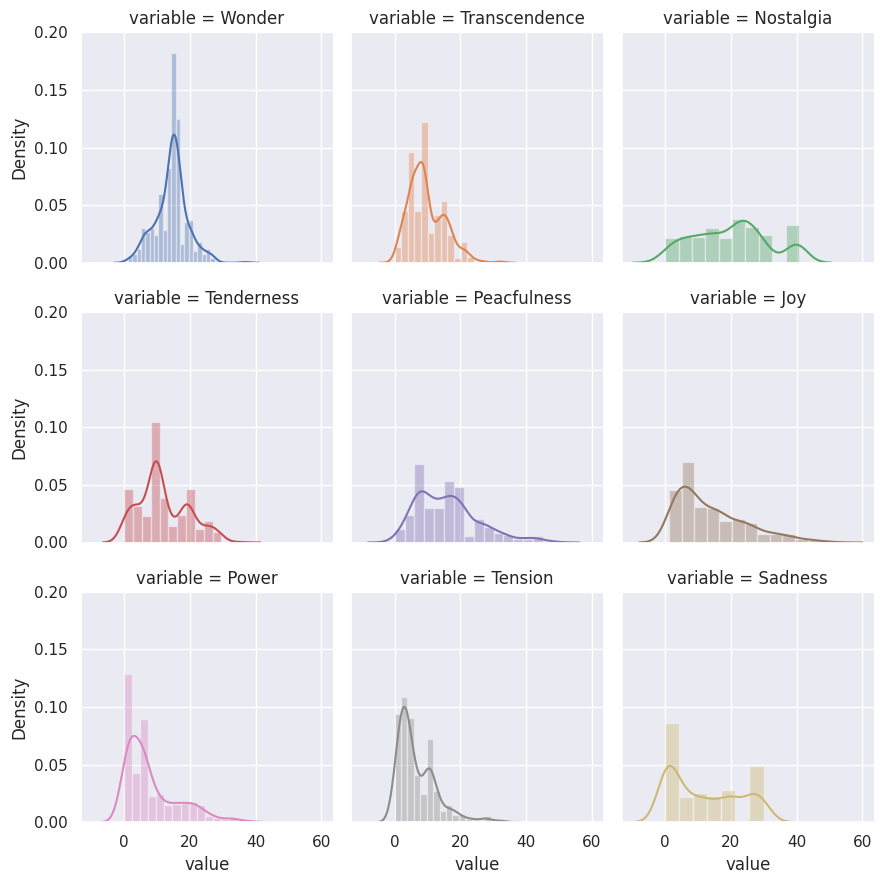

In [100]:
import matplotlib.pyplot as plt



g = sns.FacetGrid(data, col="variable", col_wrap=3, hue="variable")
g.map(sns.distplot, "value")
g.set(ylim=(0,0.2))
plt.show()

Oversample everything over the mean value??


In [101]:
new_emma.duplicated().sum()

251

/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ykinoshita/humrec_mood_tagger/mood_tagger_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureW

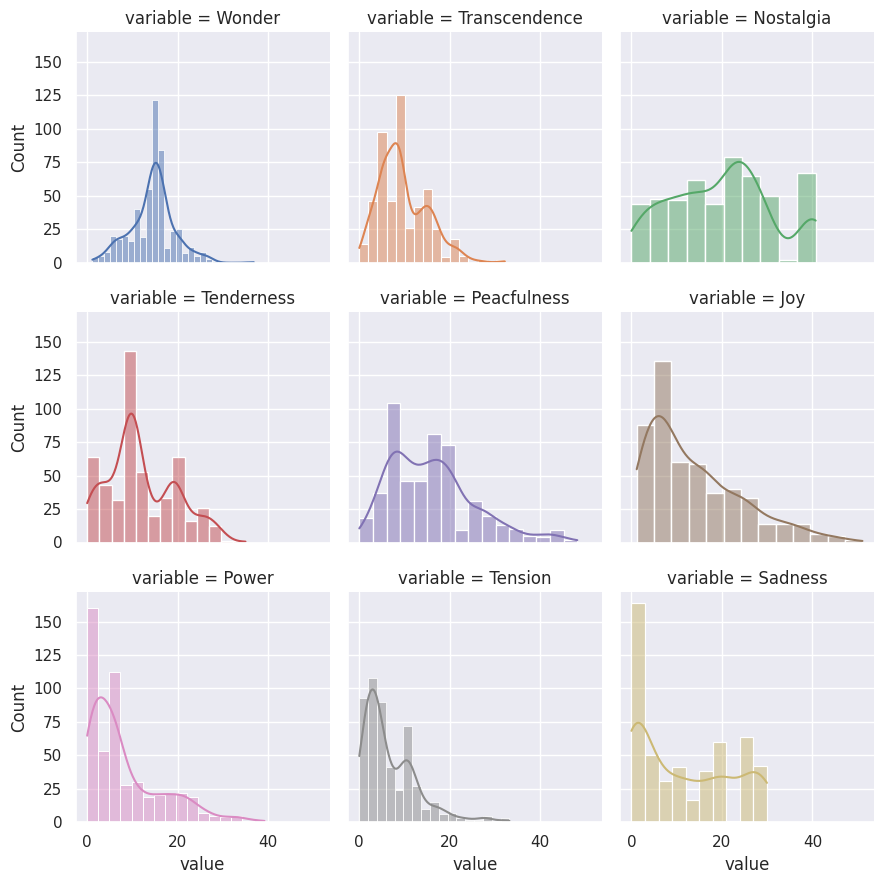

In [102]:


g = sns.FacetGrid(data, col="variable", col_wrap=3, hue="variable")
g.map(sns.histplot, "value", kde=True, stat='count')
#g.set(ylim=(0,0.2))
plt.show()

In [103]:
import collections
print([item for item, count in collections.Counter(train_indices_os_Joy).items() if count > 1])

NameError: name 'train_indices_os_Joy' is not defined